# Importing Libraries and Dataset

In [41]:
#import the libraries that will use 
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
import copy
import matplotlib.style as style
import os 
import math
from scipy import stats
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 
from sklearn.metrics import roc_auc_score

In [42]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


In [43]:
pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dython 0.7.2 requires matplotlib>=3.4.3, but you have matplotlib 3.1.1 which is incompatible.


In [49]:
from dython.nominal import associations

In [44]:
# Read the data with the Pandas libray in this stage
data = pd.read_csv('https://raw.githubusercontent.com/AlaaAli968/Bank-Churn/main/BankChurners%20(1).csv',sep = ',')

# Exploratory Data Analysis

In [5]:
# To check the datatypes as we can see do not have any null value 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
# To check the data we can use the head() function to see first 5 rows.
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
d=data.describe().T
d

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [8]:
# Double check for the null-values
data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [9]:

cat_cols = ['Attrition_Flag','Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values='Unknown')

data[cat_cols] = imputer.fit_transform(data[cat_cols])

for i in cat_cols:
  print(i)
  print(data[i].unique())
  print('-'*25)

Attrition_Flag
['Existing Customer' 'Attrited Customer']
-------------------------
Gender
['M' 'F']
-------------------------
Education_Level
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
-------------------------
Marital_Status
['Married' 'Single' 'Divorced']
-------------------------
Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
-------------------------
Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']
-------------------------


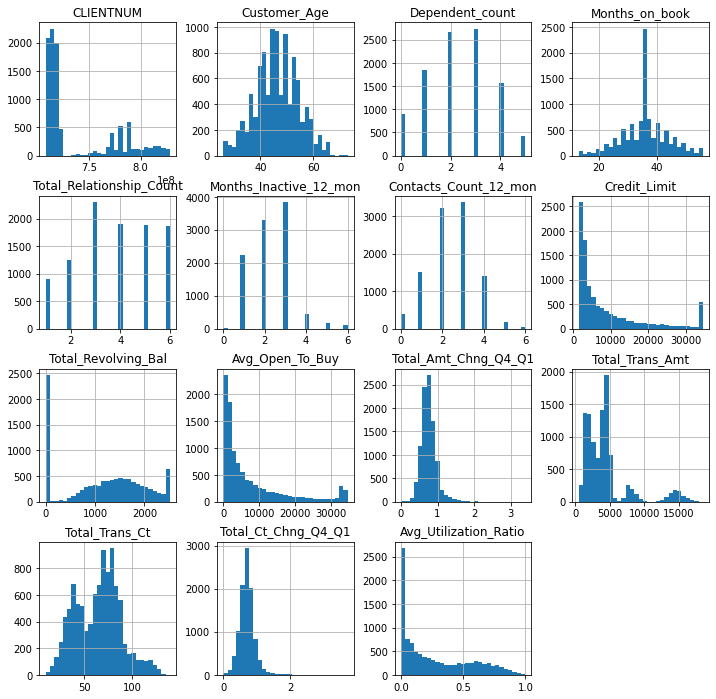

In [11]:
# distribution of numerical features
axList = data.hist(bins=29, figsize = (12, 12))
plt.savefig("Hist.png")


Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64


Text(0.5, 1.0, 'Proportion of Existing and Attrited Customer')

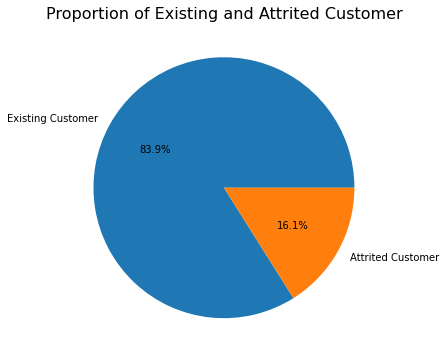

In [12]:
table=data['Attrition_Flag'].value_counts(normalize=True) * 100
print(table)
churn=data['Attrition_Flag'].value_counts()
churn
plt.figure(figsize = (6,6))
piechart=plt.pie(x=churn,labels=churn.keys(),autopct="%.1f%%")
plt.title('Proportion of Existing and Attrited Customer', fontsize = 16)
# as we see data is  imbalanced so we will apply some and random oversamling techniques later to balance it before running the models

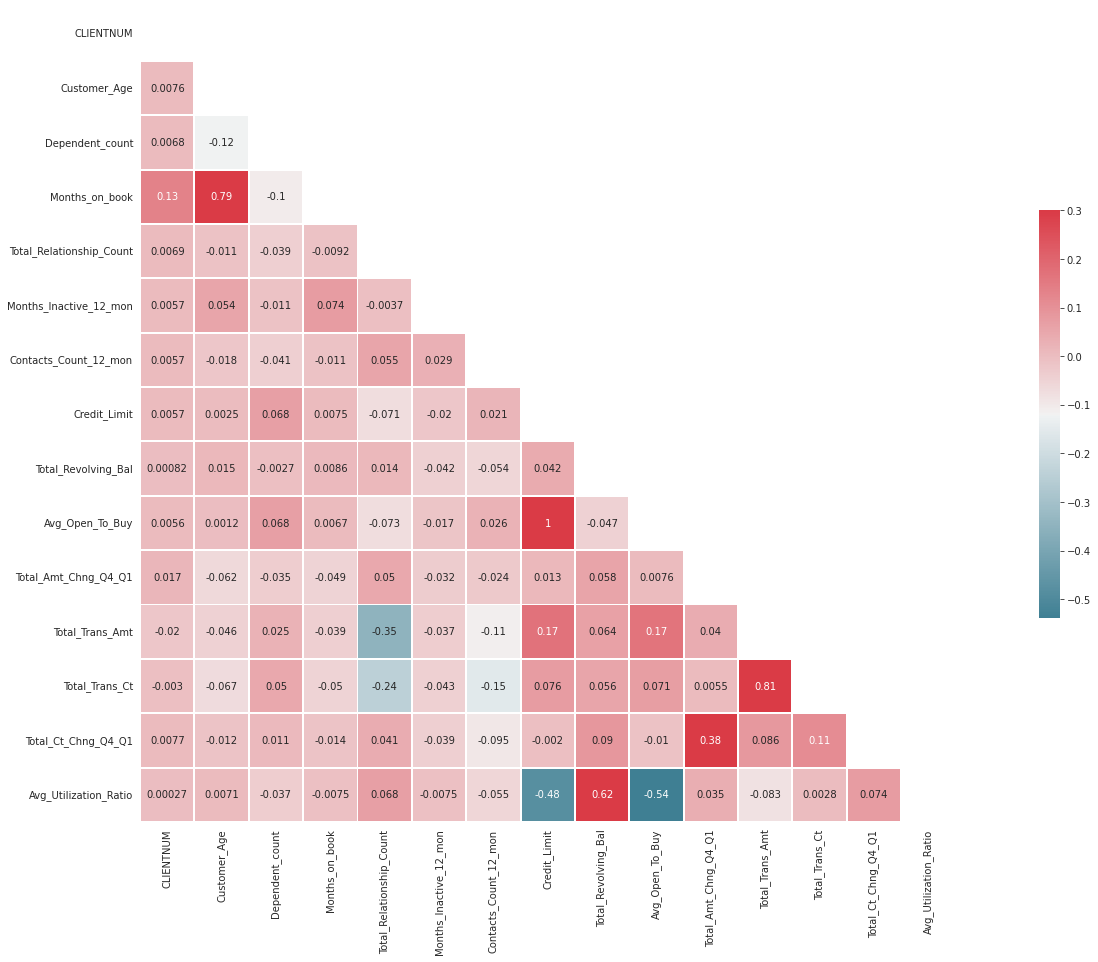

In [18]:
# correlation matrix for numeric data using Pearson correlation coefficient
new_data= copy.copy(data)

new_data['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer':1})
corr = new_data.corr()
corr

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 15))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.9, cbar_kws={"shrink": .5}, annot=True)

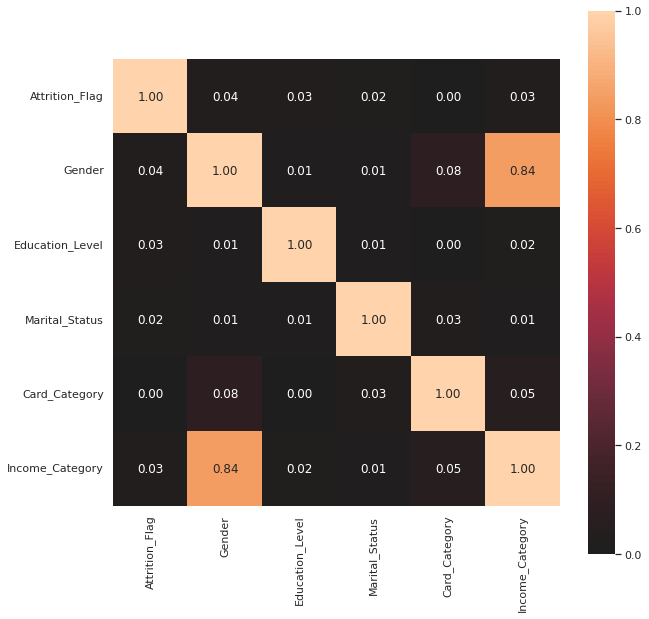

In [50]:
#correlation for categorical data (Cramer's coefficient)
selected_column= data[["Attrition_Flag","Gender","Education_Level","Marital_Status","Card_Category","Income_Category"]]
categorical_df = selected_column.copy()
categorical_correlation= associations(categorical_df, filename= 'categorical_correlation.png', figsize=(10,10))

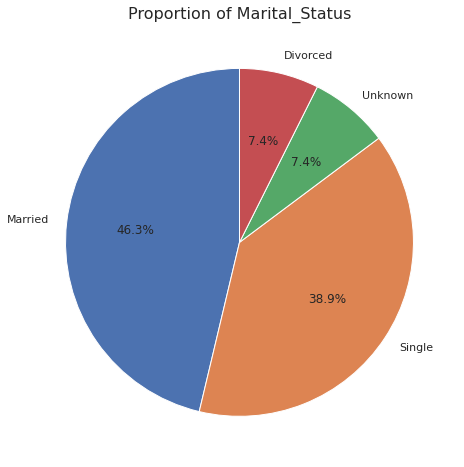

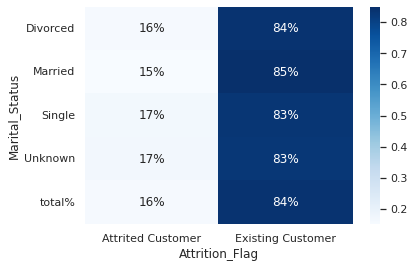

In [47]:
# Customers' Distribution  based on Marital status
plt.figure(figsize = (8,8))
plt.pie(data['Marital_Status'].value_counts(),
        labels = ['Married', 'Single', 'Unknown', 'Divorced'],
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Marital_Status', fontsize = 16)
plt.show()

# Attrition proportion between genders to see the probability of churning  in each education level category
cross = pd.crosstab(data['Marital_Status'], 
            data['Attrition_Flag'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

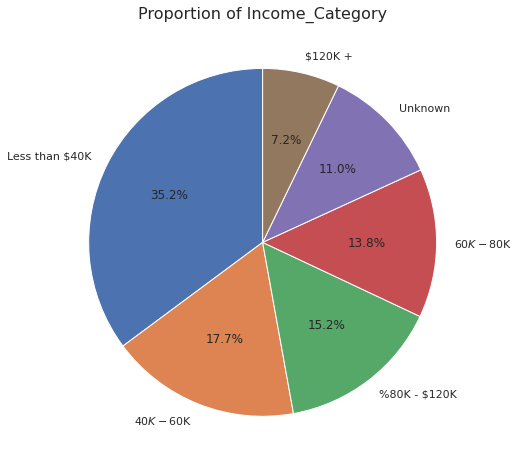

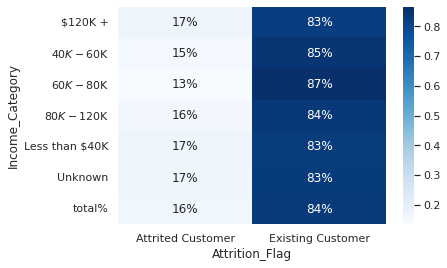

In [45]:
# Customers' Distribution based on Income Category
plt.figure(figsize = (8,8))
plt.pie(data['Income_Category'].value_counts(),
        labels = ['Less than $40K', '$40K - $60K', '%80K - $120K', '$60K - $80K', 'Unknown','$120K +'],
        autopct='%1.1f%%', startangle = 90)
plt.title('Proportion of Income_Category', fontsize = 16)
plt.show()

# Attrition proportion between genders to see the probability of churning  in each education level category
cross = pd.crosstab(data['Income_Category'], 
            data['Attrition_Flag'], 
            margins = True, 
            margins_name = "total%", 
            normalize='index')
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')


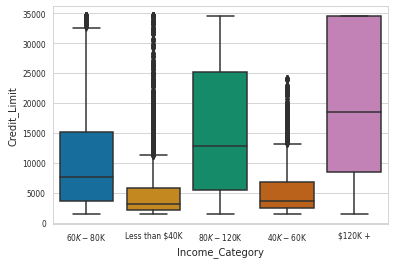

In [28]:
#Income_Category and Credit_Limit
sns.set_style("whitegrid")  
s=sns.boxplot(x = 'Income_Category', y = 'Credit_Limit', data = data,palette="colorblind")
s.tick_params(labelsize=7.5)

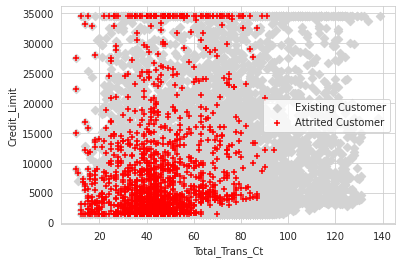

In [30]:
#Existing Customer Attrited Customer 
plt.scatter(data['Total_Trans_Ct'][(data.Attrition_Flag == 'Existing Customer') | (data.Attrition_Flag == 'Attrited Customer')],
            data['Credit_Limit'][(data.Attrition_Flag == 'Existing Customer') | (data.Attrition_Flag == 'Attrited Customer')],
           marker='D',
           color='lightgray',
           label='Existing Customer')
plt.scatter(data['Total_Trans_Ct'][data.Attrition_Flag == 'Attrited Customer'],
            data['Credit_Limit'][data.Attrition_Flag == 'Attrited Customer'],
           marker='+',
           color='red',
           label='Attrited Customer')
plt.xlabel('Total_Trans_Ct')
plt.ylabel('Credit_Limit')
plt.legend()
plt.show()


# Data Preprocessing

In [51]:
df = data.copy()

## Converting Categorical Columns to Numeric Columns


Machine learning algorithms work best with numerical data. However, in my dataset, I have some categorical columns, I need to convert them to numeric columns.




In [52]:
# Encoding our target: Attrition_Flag
df = df.replace({'Attrition_Flag':{'Existing Customer':0, 'Attrited Customer':1}})
# Selecting all the categorical features to one hot encode
df_cat = df.select_dtypes('object')

# One hot encoding
df = pd.get_dummies(df, df_cat.columns, drop_first = False)
df.dtypes

CLIENTNUM                           int64
Attrition_Flag                      int64
Customer_Age                        int64
Dependent_count                     int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Avg_Open_To_Buy                   float64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Gender_F                            uint8
Gender_M                            uint8
Education_Level_College             uint8
Education_Level_Doctorate           uint8
Education_Level_Graduate            uint8
Education_Level_High School         uint8
Education_Level_Post-Graduate       uint8
Education_Level_Uneducated        

# Split Data

I split the model into 70% training and 30% testing as it's the most popular ratio

In [53]:
from sklearn.model_selection import train_test_split
x = df.drop(['CLIENTNUM', 'Attrition_Flag'], axis = 1)
y = df['Attrition_Flag']
x_train, x_test, y_train, y_test = train_test_split(
                                    x, 
                                    y,
                                    test_size = 0.3, 
                                    random_state = 1999)

# Model Training

After splitting the data, I will create various machine learning classifiers and identify the best model out of three(in trining set)

I will train different classifiers and try to best model.
We will utilize:

1.   Random Forest
2.   Decision Tree
3. Logistic Regression

I chose these models because they are popular in binry classification problem also as I saw in Kaggle many people who have the same dataset and used these models got more accurate results.As well as I mentioned in the literature review in the related studies section most of them used Random Forest and was the best model, those studies have binary classification problems like my problem.so based on these I think Random Forest will be the best model. 

I will train these models on imbalanced data then with oversampling, I used 2 techniques for oversampling  (SMOTE and Random Oversampling) and compare between them.






# Imbalanced 

## Confusion Metric

A confusion matrix is a technique for summarizing the performance of a classification algorithm. It is a table with combinations of predicted and actual values.
For my case target is :

0 : Existing Customer

1 : Attrited Customer


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

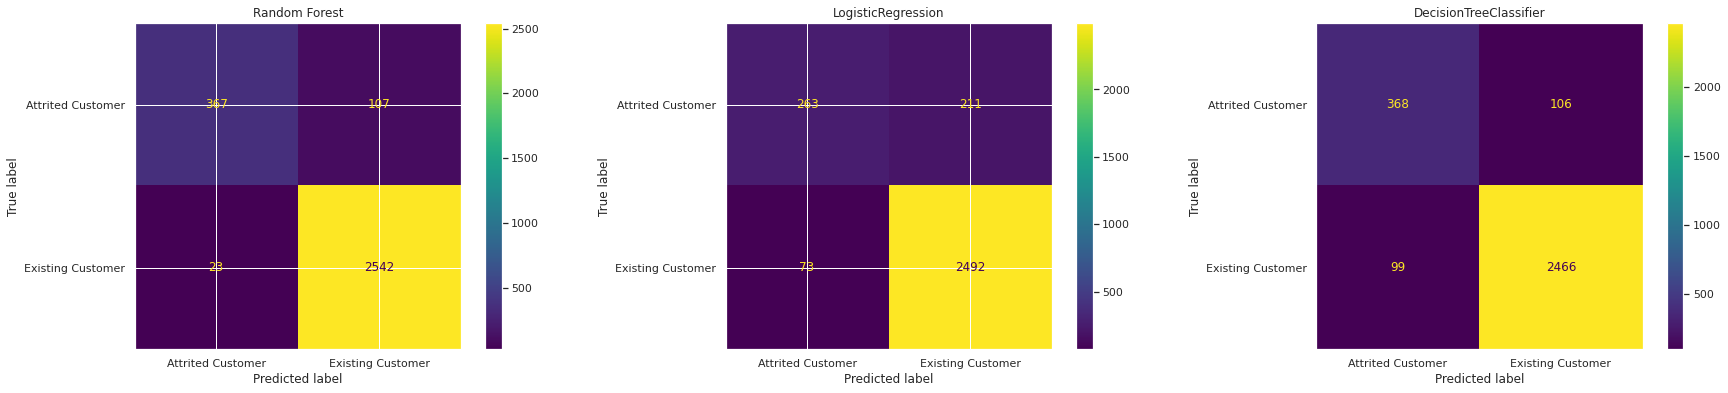

In [76]:

 
model1 = linear_model.LogisticRegression(solver="liblinear",random_state=2002)
model2 =ensemble.RandomForestClassifier(random_state=2002)
model3 = tree.DecisionTreeClassifier(random_state=2002)

model2.fit(x_train, y_train)
model1.fit(x_train, y_train)
model3.fit(x_train, y_train)

from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(ncols=3, figsize=(30,6))
plt.grid(False)
plot_confusion_matrix(model2, x_test, y_test,labels=[1,0],display_labels=["Attrited Customer", 'Existing Customer'], ax=ax[0])
ax[0].title.set_text('Random Forest')

plot_confusion_matrix(model1, x_test, y_test,labels=[1,0],display_labels=["Attrited Customer", 'Existing Customer'],ax=ax[1])
ax[1].title.set_text('LogisticRegression')



plot_confusion_matrix(model3, x_test, y_test,labels=[1,0] ,display_labels=["Attrited Customer", 'Existing Customer'],ax=ax[2])
ax[2].title.set_text('DecisionTreeClassifier')



## Build and Evaluate the Models for Imbalanced Data 

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,f1_score,brier_score_loss,matthews_corrcoef
import time
from sklearn import tree,ensemble,linear_model
#Build the 3 models
models = [tree.DecisionTreeClassifier(random_state=2002),
       ensemble.RandomForestClassifier(random_state=2002),
       linear_model.LogisticRegression(solver="liblinear",random_state=2002)]# liblinear is a good choice for small dataset 



name = []

Accuracy = []#= TP+TN/TP+FP+FN+TN 

Specificity=[]#true negative rate

Sensetivity=[]#true positive rate

auc=[]#evaluates the the model's performance across different threshold
f1=[]#
mcc=[]#Matthews correlation coefficient -1 to 1 
brier=[]#1-Acc
ptime=[]#
ttime=[]#

for i in models:

    name.append(i.__class__.__name__)

    start_f=time.time()

    i.fit(x_train, y_train)
    end_f=time.time()
    start_p=time.time()

  

    y_predicted=i.predict(x_test)

    end_p=time.time()

    train_t=end_f - start_f
    pre_t=end_f - start_f 

    Accuracy.append(accuracy_score(y_test,y_predicted))

    Specificity.append(recall_score(y_test, y_predicted, pos_label=0))#true positive rate.

    Sensetivity.append(recall_score(y_test, y_predicted, pos_label=1))#true positive rate.

    i_probs= i.predict_proba(x_test)

    i_probs=i_probs[:,1]
    mcc.append(matthews_corrcoef(y_test,y_predicted))
    auc.append(roc_auc_score(y_test,i_probs))
    f1.append(f1_score(y_test,y_predicted))
    brier.append(brier_score_loss(y_test,y_predicted))#1-ACC
    ptime.append(pre_t)
    ttime.append(train_t)


 

    

models_evaluation = pd.DataFrame({"Model": name, "MCC":mcc,"Brier":brier,"Accuracy": Accuracy,"Sensetivity":Sensetivity,"Specificity":Specificity,"F1":f1,"AUC":auc,"Predict Time":ptime,"Training Time":ttime})

display(models_evaluation)

,Model,MCC,Brier,Accuracy,Sensetivity,Specificity,F1,AUC,Predict Time,Training Time
0,DecisionTreeClassifier,0.742271,0.067456,0.932544,0.776371,0.961404,0.782147,0.868887,0.087921,0.087921
1,RandomForestClassifier,0.830211,0.042777,0.957223,0.774262,0.991033,0.849537,0.987695,1.191323,1.191323
2,LogisticRegression,0.609045,0.093452,0.906548,0.554852,0.971540,0.649383,0.922995,0.093405,0.093405


from the table we can see that Random Forest model the best model
 with really high values for Accuracy, MCC, and AUC.
 Also lowest value with Brier

## ROC curve for Imbalanced data

Next step will show ROC curve (receiver operating characteristic curve) 
a graph showing the performance of a classification model at all classification thresholds(defult 0.5). This curve plots two parameters:

1.   True Positive Rate
2.   False Positive Rate


Area Under ROC Curve (or ROC AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

Text(0.5, 0, 'False Positive Rate')

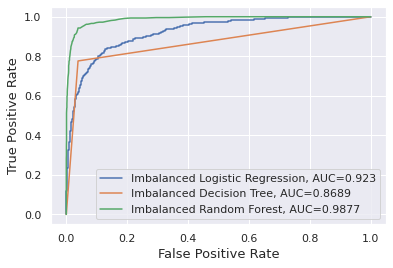

In [56]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#plt.figure(0).clf()
#fit logistic regression model and plot ROC curve
model = linear_model.LogisticRegression(solver="liblinear",random_state=2002)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]# prob number of classes 
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)#fpr:False Positive Rates, tpr: True Positive Rates, _:threshold 
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Imbalanced Logistic Regression, AUC="+str(auc))


#fit Decision Tree model and plot ROC curve
model = tree.DecisionTreeClassifier(random_state=2002)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Imbalanced Decision Tree, AUC="+str(auc))

#fit Random Forest model and plot ROC curve
model = ensemble.RandomForestClassifier(random_state=2002)
model.fit(x_train, y_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Imbalanced Random Forest, AUC="+str(auc))


#add legend
plt.legend()
plt.ylabel('True Positive Rate', size = 13)
plt.xlabel('False Positive Rate', size = 13)


## k-fold cross-validation for Imbalanced data 

To ckeck overfitting and underfitting I used Brier score which is similar to mean squared error 

Brier for Logistic Regression : 0.110 (0.007)
Brier Random Forest: 0.046 (0.007)
Brier Decision Tree: 0.064 (0.008)


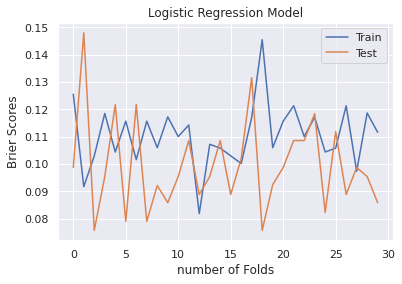

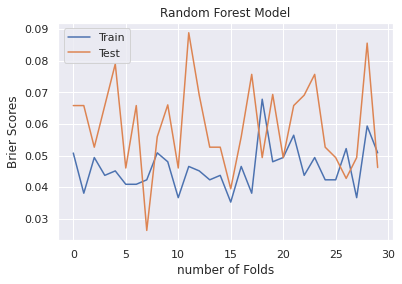

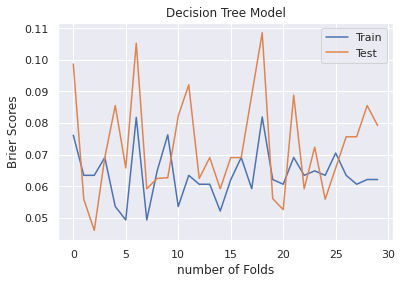

In [57]:
# Evaluate a logistic regression model using repeated k-fold cross-validation

from numpy import mean

from numpy import std

from sklearn.datasets import make_classification

from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression



# prepare the cross-validation procedure Repeats 10-Fold 3 times 

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# create models

model1 = linear_model.LogisticRegression(solver="liblinear",random_state=2002)
model2 =ensemble.RandomForestClassifier(random_state=2002)
model3 = tree.DecisionTreeClassifier(random_state=2002)

# evaluate models by Brier score which is = 1-Accuracy
scores1 = 1-cross_val_score(model1, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1) #n_job=-1 means using all processors
scores2 =1- cross_val_score(model2, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
scores3 = 1-cross_val_score(model3,x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

#to compare with test set
log_test = 1-cross_val_score(model1, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
rf_test =1- cross_val_score(model2, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
dt_test = 1-cross_val_score(model3, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)


# report performance

print('Brier for Logistic Regression : %.3f (%.3f)' % (mean(scores1),std(scores2)))
print('Brier Random Forest: %.3f (%.3f)' % (mean(scores2), std(scores2)))
print('Brier Decision Tree: %.3f (%.3f)' % (mean(scores3), std(scores3)))
#plot performance for Logistic Regression Model
plt.plot(scores1,  label='Train')
plt.plot(log_test ,label='Test')
plt.legend(loc='best')
plt.title('Logistic Regression Model')
plt.xlabel('number of Folds')
plt.ylabel('Brier Scores')
plt.savefig('number-of-cv.png')
plt.show()

#plot performance for Random Forest Model
plt.plot(scores2,  label='Train')
plt.plot(rf_test ,label='Test')
plt.legend(loc='best')
plt.title('Random Forest Model')
plt.xlabel('number of Folds')
plt.ylabel('Brier Scores')
plt.savefig('number-of-cv.png')
plt.show()
#plot performance for Decision Tree Model
plt.plot(scores3,  label='Train')
plt.plot(dt_test ,label='Test')
plt.legend(loc='best')
plt.title('Decision Tree Model')
plt.xlabel('number of Folds')
plt.ylabel('Brier Scores')
plt.savefig('number-of-cv.png')
plt.show()


# SMOTE

Now I will apply SMOTE oversampling technique to fix the imbalanced data

In [58]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


In [59]:
#Before SMOTE
unique,count=np.unique(y_train,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
print(y_train_dict_value_count)

#After SMOTE
unique,count=np.unique(y_train_res,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
print(y_train_dict_value_count)

{0: 5935, 1: 1153}
{0: 5935, 1: 5935}


## Confusion Metric

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

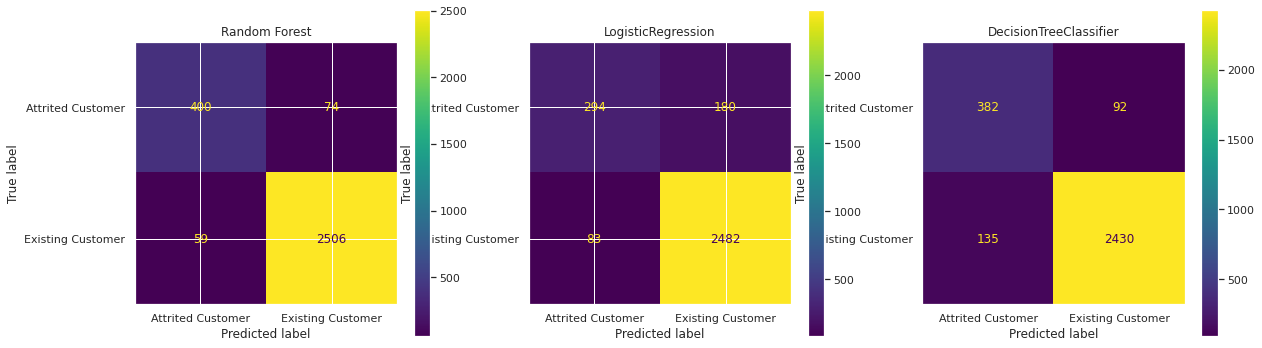

In [92]:
model1 = linear_model.LogisticRegression(solver="liblinear",random_state=2002)
model2 =ensemble.RandomForestClassifier(random_state=2002)
model3 = tree.DecisionTreeClassifier(random_state=2002)

model2.fit(x_train_res, y_train_res)
model1.fit(x_train_res, y_train_res)
model3.fit(x_train_res, y_train_res)

from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(ncols=3, figsize=(20,6))
plot_confusion_matrix(model2, x_test, y_test,labels=[1,0],display_labels=["Attrited Customer", 'Existing Customer'], ax=ax[0])
ax[0].title.set_text('Random Forest')
plot_confusion_matrix(model1, x_test, y_test, labels=[1,0],display_labels=["Attrited Customer", 'Existing Customer'],ax=ax[1])
ax[1].title.set_text('LogisticRegression')
plot_confusion_matrix(model3, x_test, y_test, labels=[1,0],display_labels=["Attrited Customer", 'Existing Customer'],ax=ax[2])
ax[2].title.set_text('DecisionTreeClassifier')
plt.grid(b=None)
fig.tight_layout(pad=53)

## Build and Evaluate the Models for balanced Data (SMOTE)

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,f1_score

from sklearn import tree,ensemble 
import time

models = [tree.DecisionTreeClassifier(random_state=2002),
       ensemble.RandomForestClassifier(random_state=2002),
       linear_model.LogisticRegression(solver="liblinear",random_state=2002)]

name = []

Accuracy = []

Specificity=[]

Sensetivity=[]

auc=[]

f1=[]

mcc=[]

brier=[]
ptime=[]
ttime=[]

for i in models:

    name.append(i.__class__.__name__)

    start_f=time.time()
  
    i.fit(x_train_res, y_train_res)
  
    end_f=time.time()
    start_p=time.time()
    

    y_predicted=i.predict(x_test)
    end_p=time.time()

    train_t=end_f - start_f
    pre_t=end_f - start_f

    Accuracy.append(accuracy_score(y_test,y_predicted))

    Specificity.append(recall_score(y_test, y_predicted, pos_label=0))

    Sensetivity.append(recall_score(y_test, y_predicted, pos_label=1))

    i_probs= i.predict_proba(x_test)

    i_probs=i_probs[:,1]
    mcc.append(matthews_corrcoef(y_test,y_predicted))


    auc.append(roc_auc_score(y_test,i_probs))
    f1.append(f1_score(y_test,y_predicted))
    brier.append(brier_score_loss(y_test,y_predicted))
    ptime.append(pre_t)
    ttime.append(train_t)


    

models_evaluation1= pd.DataFrame({"Model": name,"MCC":mcc,"Brier":brier, "Accuracy": Accuracy,"Sensetivity":Sensetivity,"Specificity":Specificity,"F1":f1,"AUC":auc,"Predict Time":ptime,"Training Time":ttime})#.style.set_caption("After SMOTE OverSampling")

display(models_evaluation1)



,Model,MCC,Brier,Accuracy,Sensetivity,Specificity,F1,AUC,Predict Time,Training Time
0,DecisionTreeClassifier,0.727393,0.074696,0.925304,0.805907,0.947368,0.770938,0.876638,0.736316,0.736316
1,RandomForestClassifier,0.831757,0.043764,0.956236,0.843882,0.976998,0.857449,0.985499,3.190659,3.190659
2,LogisticRegression,0.647079,0.086542,0.913458,0.620253,0.967641,0.690952,0.931549,0.275132,0.275132


As we can see, Random Forest is still the best model, but there is a slight decrease in the Accuracy, Auc and true negative rate after using SMOTE. On the other hand F1, true positive rate and MCC increased. 


## ROC curve for balanced Data (SMOTE)

Text(0.5, 0, 'False Positive Rate')

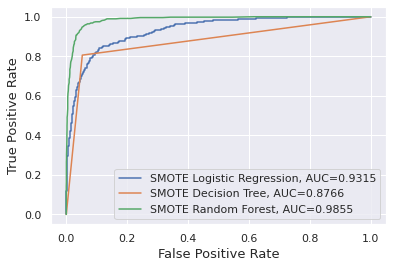

In [62]:
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#fit logistic regression model and plot ROC curve
model = linear_model.LogisticRegression(solver="liblinear",random_state=2002)
model.fit(x_train_res, y_train_res)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE Logistic Regression, AUC="+str(auc))

#fit Decision Tree model and plot ROC curve
model = tree.DecisionTreeClassifier(random_state=2002)
model.fit(x_train_res, y_train_res)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE Decision Tree, AUC="+str(auc))

#fit Random Forest model and plot ROC curve
model = ensemble.RandomForestClassifier(random_state=2002)
model.fit(x_train_res, y_train_res)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)#thrushhold 
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="SMOTE Random Forest, AUC="+str(auc))


#add legend
plt.legend()
plt.ylabel('True Positive Rate', size = 13)
plt.xlabel('False Positive Rate', size = 13)

## k-fold cross-validation for balanced data(SMOTE)

Brier for Logistic Regression : 0.071 (0.004)
Brier for Random Forest: 0.021 (0.004)
Brier for Decision Tree: 0.050 (0.006)


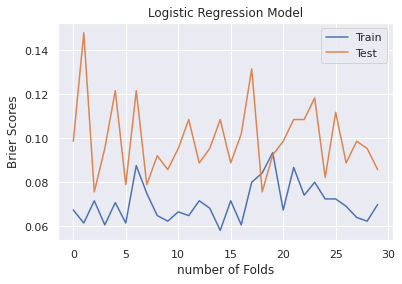

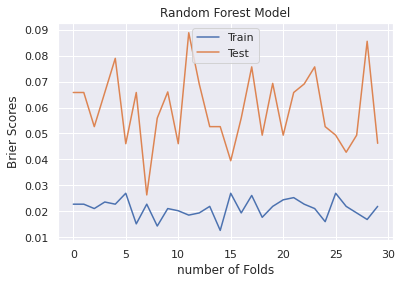

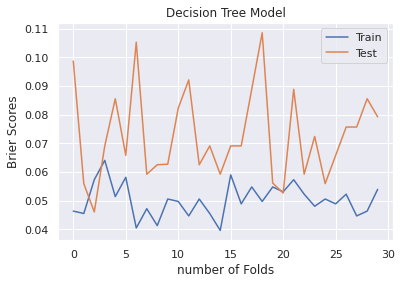

In [63]:



from sklearn.datasets import make_classification

from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression



# prepare the cross-validation procedure Repeats 10-Fold 3 times 

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)#

# create models

model1 = linear_model.LogisticRegression(solver="liblinear",random_state=2002)
model2 =ensemble.RandomForestClassifier(random_state=2002)
model3 = tree.DecisionTreeClassifier(random_state=2002)

# evaluate models by Brier score which is = 1-Accuracy
scores1 = 1-cross_val_score(model1, x_train_res, y_train_res, scoring='accuracy', cv=cv, n_jobs=-1) #n_job=-1 -1 means using all processors
scores2 =1- cross_val_score(model2, x_train_res, y_train_res, scoring='accuracy', cv=cv, n_jobs=-1)
scores3 = 1-cross_val_score(model3,x_train_res, y_train_res, scoring='accuracy', cv=cv, n_jobs=-1)
# to compare with test set 
log_test = 1-cross_val_score(model1, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
rf_test =1- cross_val_score(model2, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
dt_test = 1-cross_val_score(model3, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

#print(scores)

# report performance

print('Brier for Logistic Regression : %.3f (%.3f)' % (mean(scores1),std(scores2)))
print('Brier for Random Forest: %.3f (%.3f)' % (mean(scores2), std(scores2)))
print('Brier for Decision Tree: %.3f (%.3f)' % (mean(scores3), std(scores3)))
#plot performance for Logistic Regression Model
plt.plot(scores1,  label='Train')
plt.plot(log_test ,label='Test')
plt.legend(loc='best')
plt.title('Logistic Regression Model')
plt.xlabel('number of Folds')
plt.ylabel('Brier Scores')
plt.savefig('number-of-cv.png')
plt.show()
#plot performance for Random Forest Model

plt.plot(scores2,  label='Train')
plt.plot(rf_test ,label='Test')
plt.legend(loc='best')
plt.title('Random Forest Model')
plt.xlabel('number of Folds')
plt.ylabel('Brier Scores')
plt.savefig('number-of-cv.png')
plt.show()
#plot performance for Decision Tree Model
plt.plot(scores3,  label='Train')
plt.plot(dt_test ,label='Test')
plt.legend(loc='best')
plt.title('Decision Tree Model')
plt.xlabel('number of Folds')
plt.ylabel('Brier Scores')
plt.savefig('number-of-cv.png')
plt.show()



# Random OverSampling



In [64]:

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority',random_state=2002)
# fit and apply the transform
x_over, y_over = oversample.fit_resample(x_train, y_train)



In [65]:
#Before Random OverSampling
unique,count=np.unique(y_train,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
print(y_train_dict_value_count)

#After Random OverSampling
unique,count=np.unique(y_over,return_counts=True)
y_train_dict_value_count={k:v for (k,v) in zip(unique,count)}
print(y_train_dict_value_count)

{0: 5935, 1: 1153}
{0: 5935, 1: 5935}




## Confusion Metric


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

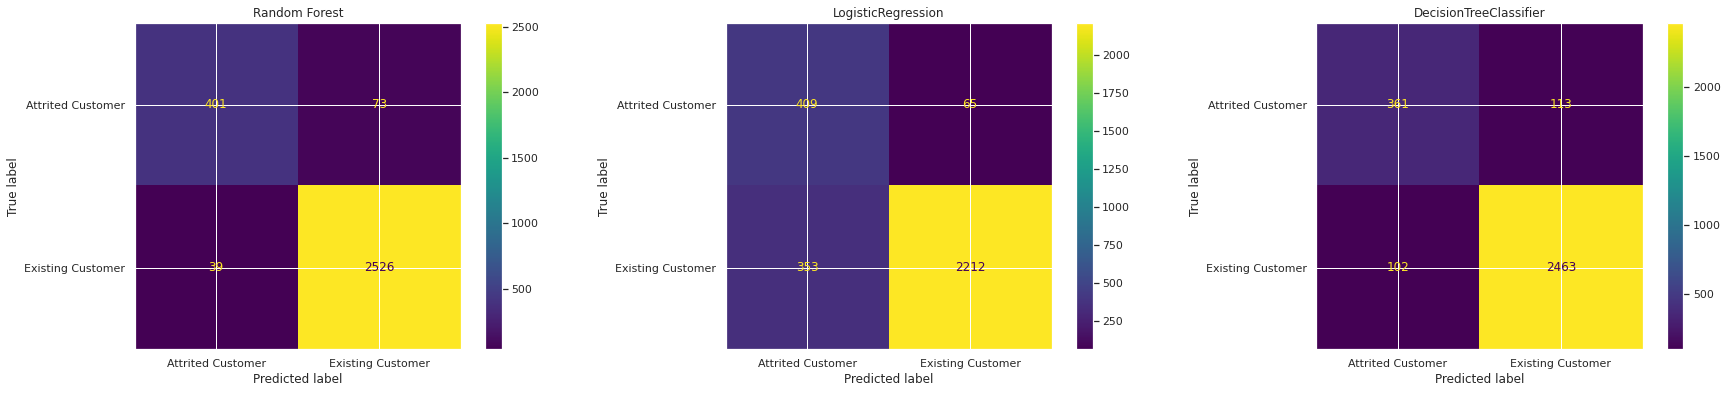

In [79]:
model1 = linear_model.LogisticRegression(solver="liblinear",random_state=2002)
model2 =ensemble.RandomForestClassifier(random_state=2002)
model3 = tree.DecisionTreeClassifier(random_state=2002)

model2.fit(x_over, y_over)
model1.fit(x_over, y_over)
model3.fit(x_over, y_over)

from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(ncols=3, figsize=(30,6))
plot_confusion_matrix(model2, x_test, y_test, labels=[1,0],display_labels=["Attrited Customer", 'Existing Customer'], ax=ax[0])

ax[0].title.set_text('Random Forest')
plot_confusion_matrix(model1, x_test, y_test, labels=[1,0],display_labels=["Attrited Customer", 'Existing Customer'],ax=ax[1])
ax[1].title.set_text('LogisticRegression')
plot_confusion_matrix(model3, x_test, y_test, labels=[1,0],display_labels=["Attrited Customer", 'Existing Customer'],ax=ax[2])
ax[2].title.set_text('DecisionTreeClassifier')
fig.tight_layout(pad=53)

## Build and Evaluate the Models for balanced Data (ROS)

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score,recall_score,f1_score

from sklearn import tree,ensemble 
import time

models = [tree.DecisionTreeClassifier(random_state=2002),
       ensemble.RandomForestClassifier(random_state=2002),
       linear_model.LogisticRegression(solver="liblinear",random_state=2002)]

name = []

Accuracy = []

Specificity=[]

Sensetivity=[]

auc=[]

f1=[]

mcc=[]

brier=[]
ptime=[]
ttime=[]

for i in models:

    name.append(i.__class__.__name__)

    start_f=time.time()
  
    i.fit(x_over, y_over)
  
    end_f=time.time()
    start_p=time.time()
    

    y_predicted=i.predict(x_test)
    end_p=time.time()

    train_t=end_f - start_f
    pre_t=end_f - start_f

    Accuracy.append(accuracy_score(y_test,y_predicted))

    Specificity.append(recall_score(y_test, y_predicted, pos_label=0))

    Sensetivity.append(recall_score(y_test, y_predicted, pos_label=1))

    i_probs= i.predict_proba(x_test)

    i_probs=i_probs[:,1]
    mcc.append(matthews_corrcoef(y_test,y_predicted))


    auc.append(roc_auc_score(y_test,i_probs))
    f1.append(f1_score(y_test,y_predicted))
    brier.append(brier_score_loss(y_test,y_predicted))
    ptime.append(pre_t)
    ttime.append(train_t)


    

models_evaluation = pd.DataFrame({"Model": name,"MCC":mcc,"Brier":brier, "Accuracy": Accuracy,"Sensetivity":Sensetivity,"Specificity":Specificity,"F1":f1,"AUC":auc,"Predict Time":ptime,"Training Time":ttime}).style.set_caption("After Random OverSampling")

display(models_evaluation)


,Model,MCC,Brier,Accuracy,Sensetivity,Specificity,F1,AUC,Predict Time,Training Time
0,DecisionTreeClassifier,0.728801,0.070747,0.929253,0.761603,0.960234,0.770544,0.860919,0.126819,0.126819
1,RandomForestClassifier,0.856629,0.036854,0.963146,0.845992,0.984795,0.877462,0.989045,1.716048,1.716048
2,LogisticRegression,0.607100,0.137545,0.862455,0.862869,0.862378,0.661812,0.931403,0.239780,0.239780


Random Forest with Random Oversampling gave the best results compared with SMOTE and imbalanced data with all results. MCC 0.856629 which is close to 1 our target. Brier scores very close to zero.  Accuracy, Sensitivity, Specificity, F1 and AUC increased.

## ROC curve for balanced Data ( Random OverSampling)

Text(0.5, 0, 'False Positive Rate')

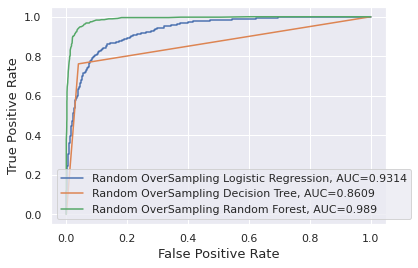

In [81]:
#plt.figure(0).clf()
#fit logistic regression model and plot ROC curve
model = linear_model.LogisticRegression(solver="liblinear",random_state=2002)
model.fit(x_over, y_over)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random OverSampling Logistic Regression, AUC="+str(auc))

#fit Decision Tree model and plot ROC curve
model = tree.DecisionTreeClassifier(random_state=2002)
model.fit(x_over, y_over)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random OverSampling Decision Tree, AUC="+str(auc))

#fit Random Forest model and plot ROC curve
model = ensemble.RandomForestClassifier(random_state=2002)
model.fit(x_over, y_over)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random OverSampling Random Forest, AUC="+str(auc))


#add legend
plt.legend()
plt.ylabel('True Positive Rate', size = 13)
plt.xlabel('False Positive Rate', size = 13)

## k-fold cross-validation for balanced data(Random OverSampling)

Average Brier for Logistic Regression : 0.155 (0.003)
Average Brier Random Forest: 0.011 (0.003)
Average Brier Decision Tree: 0.021 (0.004)


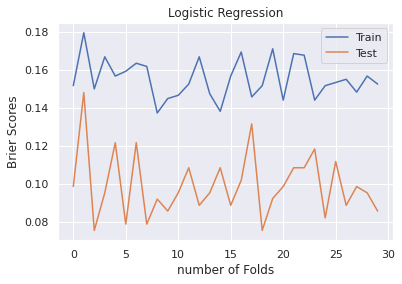

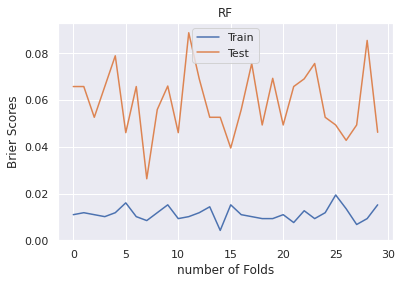

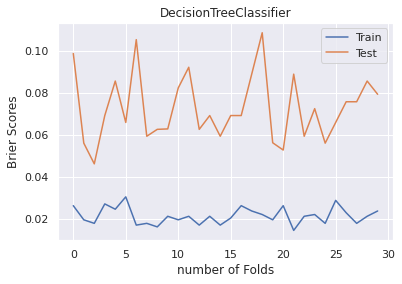

In [82]:


# evaluate a logistic regression model using repeated k-fold cross-validation

from numpy import mean

from numpy import std

from sklearn.datasets import make_classification

from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression



# prepare the cross-validation procedure

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# create models
model1 = linear_model.LogisticRegression(solver="liblinear",random_state=2002)
model2 =ensemble.RandomForestClassifier(random_state=2002)
model3 = tree.DecisionTreeClassifier(random_state=2002)

#evaluate models by Brier score which is = 1-Accuracy
scores1 = 1-cross_val_score(model1, x_over, y_over, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = 1-cross_val_score(model2, x_over, y_over, scoring='accuracy', cv=cv, n_jobs=-1)
scores3 = 1-cross_val_score(model3, x_over, y_over, scoring='accuracy', cv=cv, n_jobs=-1)

log_test = 1-cross_val_score(model1, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
rf_test = 1-cross_val_score(model2, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
dt_test =1- cross_val_score(model3, x_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

#print(scores)

# report performance

print('Average Brier for Logistic Regression : %.3f (%.3f)' % (mean(scores1),std(scores2)))
print('Average Brier Random Forest: %.3f (%.3f)' % (mean(scores2), std(scores2)))
print('Average Brier Decision Tree: %.3f (%.3f)' % (mean(scores3), std(scores3)))


plt.plot(scores1,  label='Train')
plt.plot(log_test ,label='Test')
plt.legend(loc='best')
plt.title('Logistic Regression')
plt.xlabel('number of Folds')
plt.ylabel('Brier Scores')
plt.savefig('number-of-cv.png')
plt.show()


plt.plot(scores2,  label='Train')
plt.plot(rf_test ,label='Test')
plt.legend(loc='best')
plt.title('RF')
plt.xlabel('number of Folds')
plt.ylabel('Brier Scores')
plt.savefig('number-of-cv.png')
plt.show()

plt.plot(scores3,  label='Train')
plt.plot(dt_test ,label='Test')
plt.legend(loc='best')
plt.title('DecisionTreeClassifier')
plt.xlabel('number of Folds')
plt.ylabel('Brier Scores')
plt.savefig('number-of-cv.png')
plt.show()

# Feature Importance



feature importance based on best model Random Forest 

In [84]:
forest = ensemble.RandomForestClassifier(random_state=2002)
forest.fit(x_over, y_over)
forest.feature_importances_


array([2.66571716e-02, 1.20702993e-02, 2.20177340e-02, 4.22616346e-02,
       2.93858338e-02, 2.41002413e-02, 2.92718725e-02, 1.07260195e-01,
       3.28002949e-02, 6.42345574e-02, 2.02364333e-01, 1.92517799e-01,
       9.02309290e-02, 6.67051075e-02, 5.72714304e-03, 5.21913643e-03,
       2.43197464e-03, 1.47419096e-03, 2.92736879e-03, 2.72334752e-03,
       1.59999867e-03, 2.55699191e-03, 3.01333341e-03, 1.43272535e-03,
       4.81516105e-03, 4.45981251e-03, 1.75512984e-03, 1.80624571e-03,
       2.64406387e-03, 3.04884972e-03, 2.49432642e-03, 2.46549752e-03,
       1.85752028e-03, 1.47811392e-03, 7.34117665e-04, 1.11980758e-04,
       1.34496734e-03])

In [26]:
# feature importance dataframe
feat_imp = pd.DataFrame({'Feature': x_over.columns,
                         'Importance': forest.feature_importances_})
feat_imp_sort = feat_imp.sort_values(by='Importance', ascending=False)
feat_imp_sort

,Feature,Importance
10,Total_Trans_Amt,0.202364
11,Total_Trans_Ct,0.192518
7,Total_Revolving_Bal,0.107260
12,Total_Ct_Chng_Q4_Q1,0.090231
13,Avg_Utilization_Ratio,0.066705
9,Total_Amt_Chng_Q4_Q1,0.064235
3,Total_Relationship_Count,0.042262
8,Avg_Open_To_Buy,0.032800
4,Months_Inactive_12_mon,0.029386
6,Credit_Limit,0.029272


In [86]:

from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(ensemble.RandomForestClassifier(random_state=2002)) 

#removed if the corresponding importance of the feature values are below the provided threshold parameter
sel.fit(x_over, y_over)
sel.get_support()

selected_feat= x_over.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

10
Index(['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')


## Relationship between the churn rate and important features

Text(0.5, 1.0, 'Correlation with Churn Rate \n')

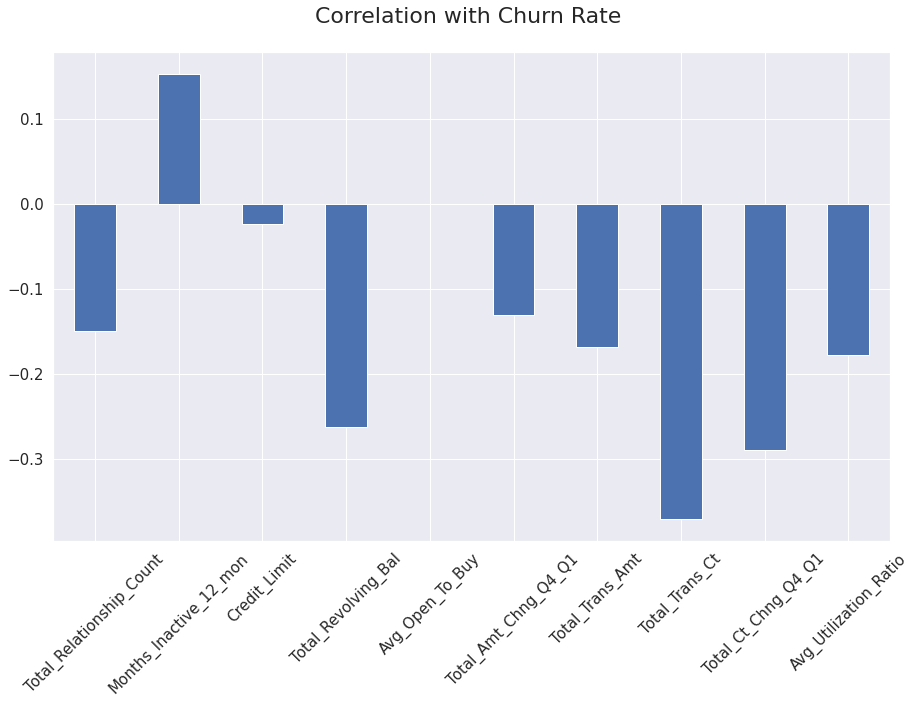

In [88]:

dataset2=df[['Total_Relationship_Count', 'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

correlations = dataset2.corrwith(df.Attrition_Flag)

correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (15, 9), 
        fontsize = 15, 
        #color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [5]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic



Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-plain-generic is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [7]:
!jupyter nbconvert --to pdf /Customers_Attraction.ipynb

[NbConvertApp] WARNING | pattern '/Customers_Attraction.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--e

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
